# Data Exploration of NYC Poverty Measure Data

### Import required libraries and load the data

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_columns = None # display all columns

# load the data
data_frame = pd.read_csv("NYCgov_Poverty_Measure_Data.csv")

# Exploratory Data Analysis

### Year Income of Poverty and Non-Poverty Groups

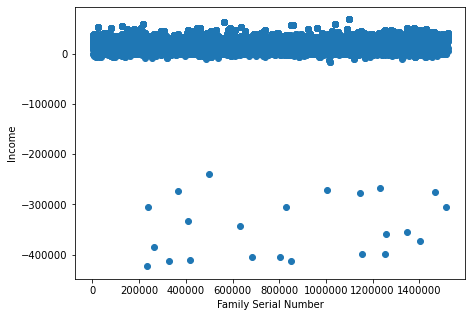

In [99]:
poverty_group = data_frame[data_frame.NYCgov_Pov_Stat == 1]
non_poverty_group = data_frame[data_frame.NYCgov_Pov_Stat == 2]

# plot the poverty group data
plt.figure(figsize=(7,5))
plt.scatter(poverty_group.SERIALNO, poverty_group.NYCgov_Income)
plt.ylabel('Income')
plt.xlabel('Family Serial Number')
plt.ticklabel_format(useOffset=False, style="plain")
#plt.savefig("1.png")
plt.show()


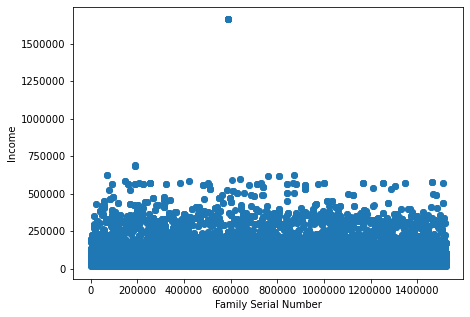

In [100]:
# plot the non-poverty group data
plt.figure(figsize=(7,5))
plt.scatter(non_poverty_group.SERIALNO, non_poverty_group.NYCgov_Income)
plt.ylabel('Income')
plt.xlabel('Family Serial Number')
plt.ticklabel_format(useOffset=False, style="plain")
#plt.savefig("2.png")
plt.show()

### Poverty vs Non-Poverty Population

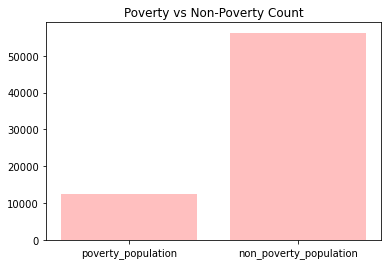

Poverty Entries: 12409 | Non-Poverty Entries: 56235
Percentage of Non-Poverty Entries: 82


In [101]:
index = ['poverty_population','non_poverty_population']
bar = [len(poverty_group), len(non_poverty_group)]

plt.bar(index, bar, alpha=0.25, color='red') 
plt.title('Poverty vs Non-Poverty Count')
#plt.savefig("3.png")
plt.show()

print(f"Poverty Entries: {len(poverty_group)} | Non-Poverty Entries: {len(non_poverty_group)}")
print(f"Percentage of Non-Poverty Entries: {round(len(non_poverty_group)/(len(poverty_group) + len(non_poverty_group))*100)}")


### Poverty vs Non-Poverty Population in Different Towns of NY

In [102]:
split_poverty_group = poverty_group.groupby('Boro').Boro.count()
index = split_poverty_group.index
values = split_poverty_group.values

town_label = [1, 2, 3, 4, 5]
town_name = ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']
town_dict = dict(zip(town_label, town_name))

print(town_dict)
print(split_poverty_group)

split_non_poverty_group = non_poverty_group.groupby('Boro').Boro.count()
index = split_non_poverty_group.index
values = split_non_poverty_group.values

print(split_non_poverty_group)

{1: 'Bronx', 2: 'Brooklyn', 3: 'Manhattan', 4: 'Queens', 5: 'Staten Island'}
Boro
1    2368
2    4558
3    1184
4    3748
5     551
Name: Boro, dtype: int64
Boro
1     7321
2    20117
3     7616
4    17721
5     3460
Name: Boro, dtype: int64


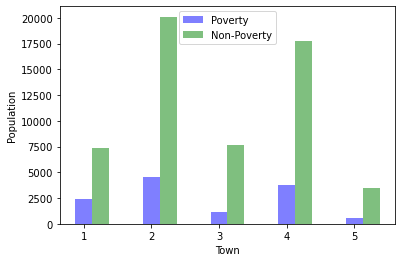

{1: 'Bronx', 2: 'Brooklyn', 3: 'Manhattan', 4: 'Queens', 5: 'Staten Island'}


In [103]:
fig, ax = plt.subplots()
bar_width = 0.25
opacity = 0.5

pv = split_poverty_group.values
npv = split_non_poverty_group.values    
rects1 = plt.bar(split_poverty_group.index, pv, bar_width, alpha=opacity, color='b', label='Poverty')
rects2 = plt.bar(split_poverty_group.index + bar_width, npv, bar_width, alpha=opacity, color='g', label='Non-Poverty')

plt.xlabel('Town')
plt.ylabel('Population')
plt.legend()
#plt.savefig("4.png")
plt.show()
print(town_dict)

# Decision Tree Prior to Pre-Processing

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [105]:
raw_data_frame = data_frame
raw_data_frame = raw_data_frame.dropna()

raw_X = raw_data_frame.drop("NYCgov_Pov_Stat", axis=1)
raw_y = raw_data_frame.NYCgov_Pov_Stat

## Split the Data to Train and Test Sets

In [106]:
raw_train_X, raw_test_X, raw_train_y, raw_test_y = train_test_split(raw_X, raw_y, test_size=0.2, random_state=0)
print("Train Data shape: {0}".format(raw_train_X.shape))
print("Train Labels shape: {0}".format(raw_train_y.shape))
print("Test Data shape: {0}".format(raw_test_X.shape))
print("Test Labels shape: {0}".format(raw_test_y.shape))

Train Data shape: (12013, 78)
Train Labels shape: (12013,)
Test Data shape: (3004, 78)
Test Labels shape: (3004,)


## Fit the Model

In [107]:
raw_classifier = DecisionTreeClassifier()
raw_classifier.fit(raw_train_X, raw_train_y)

DecisionTreeClassifier()

In [108]:
raw_predictions_y = raw_classifier.predict(raw_test_X)
confusion_matrix(raw_test_y, raw_predictions_y)

array([[ 445,    0],
       [   0, 2559]], dtype=int64)

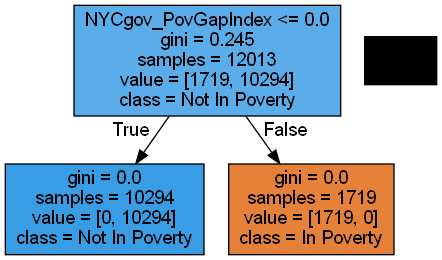

In [109]:
from io import StringIO
from sklearn import tree
import pydotplus
from IPython.display import Image

class_names = {1: "In Poverty", 2: "Not In Poverty"}
dot_data =  StringIO()
tree.export_graphviz(raw_classifier, out_file=dot_data, feature_names=list(raw_X.columns),
                     class_names=np.vectorize(class_names.get)(raw_classifier.classes_),filled=True)

graph1 = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph1.create_png()) 

# Handling Missing Data

[('ENG', 38015), ('ESR', 12198), ('EducAttain', 2240), ('JWTR', 36009), ('LANX', 3738), ('MSP', 11419), ('Off_Threshold', 2), ('SCHL', 2241), ('WKW', 32406)]


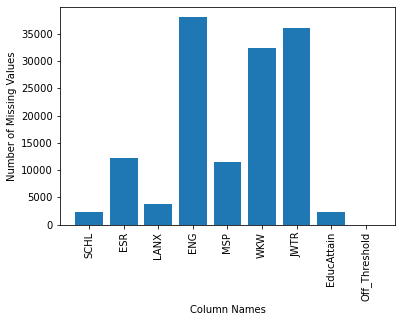

In [110]:
missing_columns = []
missing_values = []
for index in data_frame.columns:
    if (len(data_frame) - data_frame[index].count()>0):
        missing_columns.append(index)
        missing_values.append(len(data_frame) - data_frame[index].count())

count = dict(zip(missing_columns, missing_values))
print(sorted(count.items()))
plt.bar(missing_columns, missing_values)
plt.xlabel("Column Names")
plt.ylabel("Number of Missing Values")
plt.xticks(missing_columns, missing_columns, rotation="vertical")
plt.show()

### Count Of Categorical Values In Features Before Imputation 

In [111]:
# Understanding Missing Values

print(data_frame.groupby('ENG').ENG.count())
print(data_frame.groupby('ESR').ESR.count())
print(data_frame.groupby('EducAttain').EducAttain.count())
print(data_frame.groupby('JWTR').JWTR.count())
print(data_frame.groupby('LANX').LANX.count())
print(data_frame.groupby('MSP').MSP.count())
print(data_frame.groupby('Off_Threshold').Off_Threshold.count())
print(data_frame.groupby('SCHL').SCHL.count())
print(data_frame.groupby('WKW').SCHL.count())

ENG
1.0    16275
2.0     6832
3.0     5366
4.0     2156
Name: ENG, dtype: int64
ESR
1.0    32618
2.0      875
3.0     2253
4.0       17
6.0    20683
Name: ESR, dtype: int64
EducAttain
1.0    20618
2.0    13081
3.0    12397
4.0    20308
Name: EducAttain, dtype: int64
JWTR
1.0      9632
2.0      3129
3.0        51
4.0     13938
5.0       553
6.0       114
7.0       272
8.0        43
9.0       413
10.0     2884
11.0     1405
12.0      201
Name: JWTR, dtype: int64
LANX
1.0    30629
2.0    34277
Name: LANX, dtype: int64
MSP
1.0    22420
2.0     2476
3.0     3347
4.0     4528
5.0     1613
6.0    22841
Name: MSP, dtype: int64
Off_Threshold
11511.0    3411
12486.0    8625
14507.0    4800
16072.0    8758
16480.0      54
16543.0    1300
18774.0    5889
19318.0    5133
19337.0    1050
24339.0    6152
24424.0     508
24755.0    3624
25160.0    2904
28205.0     170
28643.0    2570
29360.0    2055
29854.0    1390
30288.0    1755
31470.0      60
32070.0     912
33082.0     678
33763.0    1134
34337.0

### Count Of Categorical Values In Features After Imputation

In [112]:
for index in missing_columns:
    data_frame[index].fillna(method='ffill',inplace=True)

print(data_frame.groupby('ENG').ENG.count())
print(data_frame.groupby('ESR').ESR.count())
print(data_frame.groupby('EducAttain').EducAttain.count())
print(data_frame.groupby('JWTR').JWTR.count())
print(data_frame.groupby('LANX').LANX.count())
print(data_frame.groupby('MSP').MSP.count())
print(data_frame.groupby('Off_Threshold').Off_Threshold.count())
print(data_frame.groupby('SCHL').SCHL.count())
print(data_frame.groupby('WKW').SCHL.count())

data_frame.loc[0,'WKW'] = 1
data_frame.loc[0,'JWTR'] = 1

ENG
1.0    39370
2.0    14161
3.0    10547
4.0     4566
Name: ENG, dtype: int64
ESR
1.0    39317
2.0     1136
3.0     2849
4.0       18
6.0    25324
Name: ESR, dtype: int64
EducAttain
1.0    21830
2.0    13315
3.0    12639
4.0    20860
Name: EducAttain, dtype: int64
JWTR
1.0     21127
2.0      6822
3.0       105
4.0     28123
5.0      1104
6.0       226
7.0       599
8.0        75
9.0       758
10.0     6386
11.0     2894
12.0      424
Name: JWTR, dtype: int64
LANX
1.0    32554
2.0    36090
Name: LANX, dtype: int64
MSP
1.0    27945
2.0     2838
3.0     3474
4.0     5030
5.0     1891
6.0    27466
Name: MSP, dtype: int64
Off_Threshold
11511.0    3411
12486.0    8625
14507.0    4800
16072.0    8758
16480.0      54
16543.0    1300
18774.0    5889
19318.0    5133
19337.0    1050
24339.0    6152
24424.0     508
24755.0    3624
25160.0    2904
28205.0     170
28643.0    2570
29360.0    2055
29854.0    1390
30288.0    1755
31470.0      60
32070.0     912
33082.0     678
33763.0    1134
34337.0

# Decision Tree with Pre-Processing

In [113]:
new_data_frame = data_frame

corr = new_data_frame[new_data_frame.columns[0:]].corr()['NYCgov_Income'][:]
corr = pd.DataFrame(corr)
corr[corr.NYCgov_Income > 0.7]

,NYCgov_Income
PreTaxIncome_PU,0.965977
NYCgov_FICAtax,0.908605
NYCgov_IncomeTax,0.855588
NYCgov_Income,1.000000


In [114]:
new_data_frame = new_data_frame.drop(['SERIALNO','NP','SPORDER','PWGTP','NYCgov_Income','PreTaxIncome_PU','NYCgov_IncomeTax','NYCgov_FICAtax','NYCgov_PovGap','NYCgov_PovGapIndex',
                    'Off_Pov_Stat','NYCgov_Threshold', 'Off_Threshold','TaxUnit_FILETYPE','AgeCateg','NYCgov_REL','NYCgov_SFN','HIUnit_ID','SNAPUnit_ID'],axis=1)

# selecting only the head of the family
new_data_frame = new_data_frame[new_data_frame.Povunit_Rel==1]
print(new_data_frame.shape)
len(new_data_frame[new_data_frame.NYCgov_Pov_Stat == 2])/len(new_data_frame)

(29619, 60)


0.7932408251460211

### Splitting Train and Test Data

In [115]:
train, test = train_test_split(new_data_frame, test_size=0.2,random_state = 25)
print(train.shape, test.shape)

train_X = train.drop('NYCgov_Pov_Stat', axis=1)
train_y = train.NYCgov_Pov_Stat
test_X = test.drop('NYCgov_Pov_Stat', axis=1)
test_y = test.NYCgov_Pov_Stat
print("Train Data shape: {0}".format(train_X.shape))
print("Train Labels shape: {0}".format(train_y.shape))
print("Test Data shape: {0}".format(test_X.shape))
print("Test Labels shape: {0}".format(test_y.shape))

(23695, 60) (5924, 60)
Train Data shape: (23695, 59)
Train Labels shape: (23695,)
Test Data shape: (5924, 59)
Test Labels shape: (5924,)


In [116]:
poverty = train[train.NYCgov_Pov_Stat==1]
non_poverty = train[train.NYCgov_Pov_Stat==2]
print("Observations in Non-Poverty: {0}".format(len(non_poverty)))
print("Observations in Poverty: {0}".format(len(poverty)))
print("Imbalanced Data in Training Set")

Observations in Non-Poverty: 18765
Observations in Poverty: 4930
Imbalanced Data in Training Set


## Fitting the Model to an Unbalanced Training Data

In [117]:
unbalanced_classifier = DecisionTreeClassifier(max_depth=3)
unbalanced_classifier.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=3)

In [118]:
predictions_y = unbalanced_classifier.predict(test_X)
confusion_matrix(predictions_y, test_y)

array([[ 764,  442],
       [ 430, 4288]], dtype=int64)

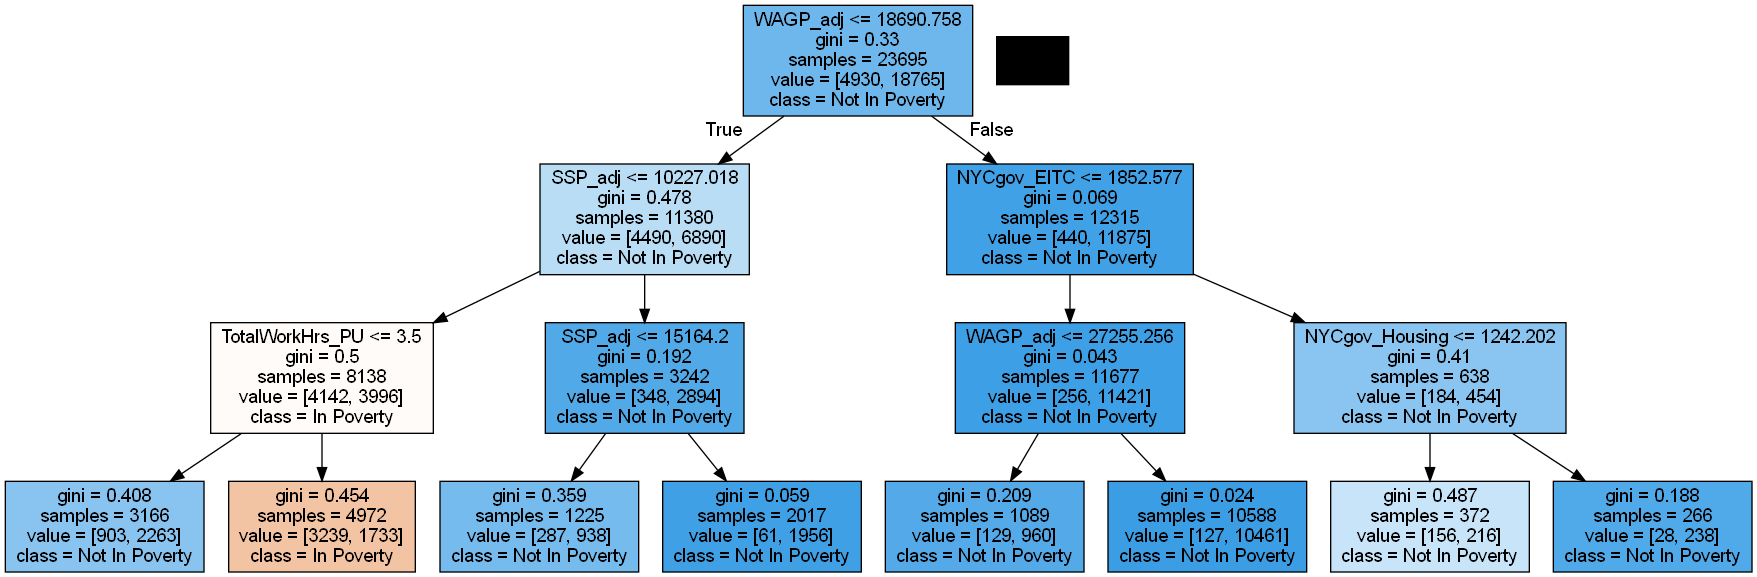

In [119]:
dot_data = StringIO()
tree.export_graphviz(unbalanced_classifier, out_file=dot_data,feature_names=list(train_X),
                     class_names=np.vectorize(class_names.get)(unbalanced_classifier.classes_),filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

### Modeling Balanced Data

In [120]:
from sklearn.utils import resample

de_non_poverty = resample(non_poverty, replace = False, n_samples = len(poverty), random_state=45)
train_balanced = pd.concat([poverty, de_non_poverty])
print(len(train_balanced[train_balanced.NYCgov_Pov_Stat==2])/len(train_balanced))
print(train_balanced.shape)

0.5
(9860, 60)


In [121]:
bal_train_X = train_balanced.drop('NYCgov_Pov_Stat', axis=1)
bal_train_y = train_balanced.NYCgov_Pov_Stat
print("Train Data shape: {0}".format(bal_train_X.shape))
print("Train Labels shape: {0}".format(bal_train_y.shape))

Train Data shape: (9860, 59)
Train Labels shape: (9860,)


In [122]:
balanced_classifier = DecisionTreeClassifier(max_depth=3)
balanced_classifier.fit(bal_train_X, bal_train_y)

bal_predictions_y = balanced_classifier.predict(test_X)
confusion_matrix(test_y, bal_predictions_y)

array([[1039,  155],
       [1039, 3691]], dtype=int64)

In [123]:
from sklearn.metrics import accuracy_score

print("Accuracy on Training Set: {0}".format(accuracy_score(bal_train_y, balanced_classifier.predict(bal_train_X))))
print("Accuracy on Test Set: {0}".format(accuracy_score(test_y, bal_predictions_y, normalize=True, sample_weight=None)))

Accuracy on Training Set: 0.8294117647058824
Accuracy on Test Set: 0.7984469952734639


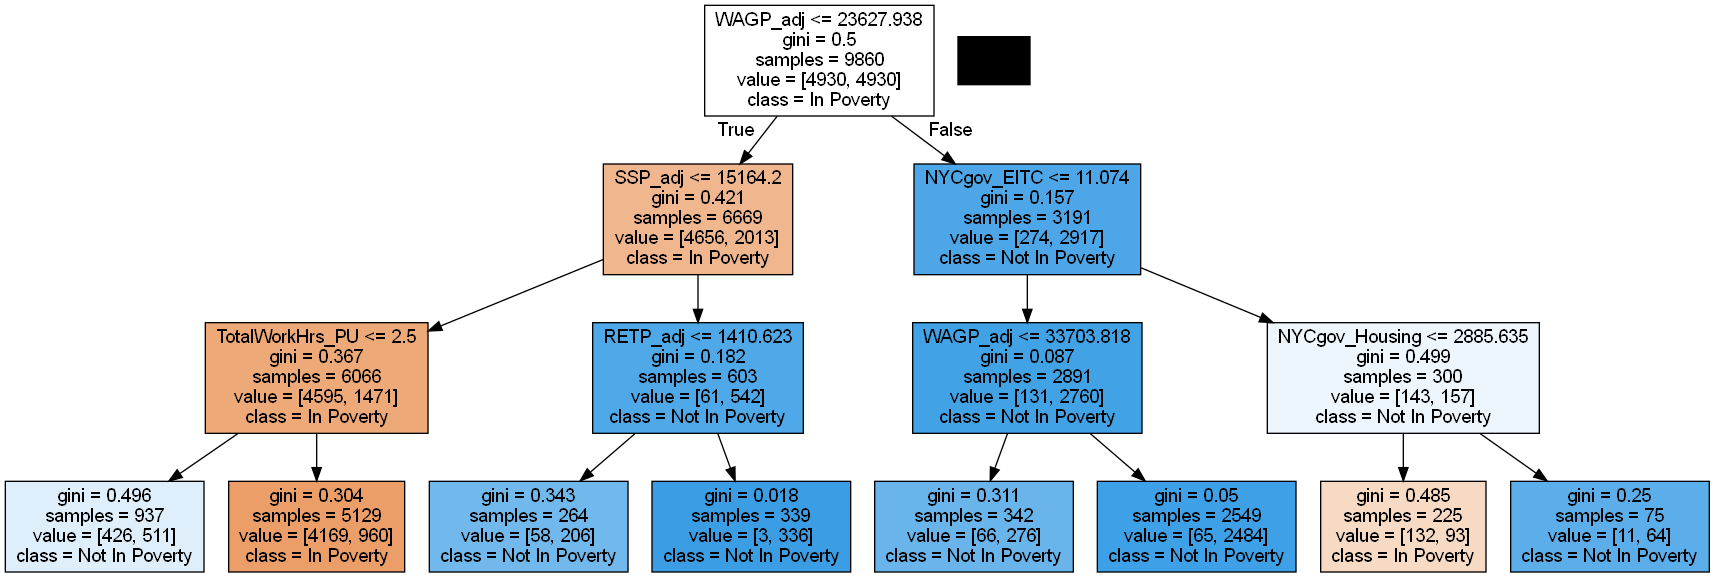

In [124]:
dot_data = StringIO()
tree.export_graphviz(balanced_classifier, out_file=dot_data, feature_names=list(bal_train_X),
                     class_names=np.vectorize(class_names.get)(balanced_classifier.classes_),filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

### Feature Importance

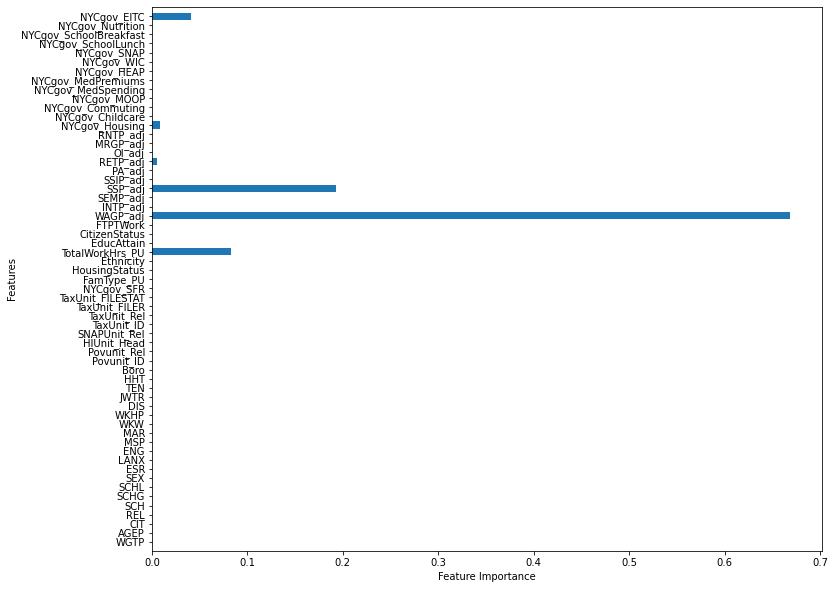

In [125]:
def plot_feature_importance(model):
    len_features = len(new_data_frame.columns[:-1])
    plt.barh(np.arange(len_features), model.feature_importances_, align = 'center')
    plt.yticks(np.arange(len_features), new_data_frame.columns[:-1])
    plt.xlabel("Feature Importance")
    plt.ylabel("Features")
    plt.ylim(-1, len_features)

plt.figure(figsize=(12,10))
plot_feature_importance(balanced_classifier)
plt.show()